# Optimización de Hiperparámetros con Optuna

Este cuaderno utiliza Optuna para optimizar modelos de clasificación: XGBoost, LightGBM y una red neuronal básica con sklearn, usando el dataset de churn en telecomunicaciones.

In [ ]:
# !pip install optuna xgboost lightgbm

In [2]:
import pandas as pd
import numpy as np
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb


/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Dataset de churn en telecomunicaciones (puedes reemplazar la ruta si tienes el archivo local)
url = ('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(url)
# Eliminar columnas no necesarias
df.drop(['customerID'], axis=1, inplace=True)

# Convertir TotalCharges a numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Variables
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Optimización de XGBoost con Optuna

In [9]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
study_xgb.best_params

[I 2025-03-27 20:36:49,601] A new study created in memory with name: no-name-2754cd4d-66b6-430f-a6a6-e5fc9d976f41
/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [20:36:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrai

{'n_estimators': 282,
 'max_depth': 8,
 'learning_rate': 0.010827488668390617,
 'subsample': 0.5120654371392341,
 'colsample_bytree': 0.5070897625173133}

## Optimización de LightGBM con Optuna

In [10]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = lgb.LGBMClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)
study_lgb.best_params

[I 2025-03-27 20:37:09,361] A new study created in memory with name: no-name-e90ff172-652d-45bb-9321-fba551dad5e9


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1.017062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:10,131] Trial 0 finished with value: 0.7726222222222222 and parameters: {'n_estimators': 367, 'max_depth': 8, 'learning_rate': 0.2586740489174422, 'subsample': 0.7395274283233435, 'colsample_bytree': 0.7250991650775989}. Best is trial 0 with value: 0.7726222222222222.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:10,310] Trial 1 finished with value: 0.7877333333333333 and parameters: {'n_estimators': 108, 'max_depth': 5, 'learning_rate': 0.28689795977375754, 'subsample': 0.6641884986332616, 'colsample_bytree': 0.6846352222459963}. Best is trial 1 with value: 0.7877333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:10,920] Trial 2 finished with value: 0.7818666666666667 and parameters: {'n_estimators': 275, 'max_depth': 8, 'learning_rate': 0.16513652565755038, 'subsample': 0.6818726759489546, 'colsample_bytree': 0.7907363274083361}. Best is trial 1 with value: 0.7877333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:11,628] Trial 3 finished with value: 0.7797333333333333 and parameters: {'n_estimators': 340, 'max_depth': 9, 'learning_rate': 0.26313959456729386, 'subsample': 0.606030605082291, 'colsample_bytree': 0.6745744239607625}. Best is trial 1 with value: 0.7877333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:12,099] Trial 4 finished with value: 0.7884444444444445 and parameters: {'n_estimators': 263, 'max_depth': 7, 'learning_rate': 0.1381104668578649, 'subsample': 0.8272461718287049, 'colsample_bytree': 0.8184674624318892}. Best is trial 4 with value: 0.7884444444444445.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:12,641] Trial 5 finished with value: 0.8028444444444446 and parameters: {'n_estimators': 356, 'max_depth': 5, 'learning_rate': 0.02044397055039828, 'subsample': 0.5619939367280298, 'colsample_bytree': 0.8231370778393017}. Best is trial 5 with value: 0.8028444444444446.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:12,992] Trial 6 finished with value: 0.7802666666666666 and parameters: {'n_estimators': 189, 'max_depth': 7, 'learning_rate': 0.2934257618061049, 'subsample': 0.6699362990830442, 'colsample_bytree': 0.7488179136236863}. Best is trial 5 with value: 0.8028444444444446.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:13,657] Trial 7 finished with value: 0.7795555555555556 and parameters: {'n_estimators': 356, 'max_depth': 10, 'learning_rate': 0.18032382447984213, 'subsample': 0.8020364944855148, 'colsample_bytree': 0.688645963374399}. Best is trial 5 with value: 0.8028444444444446.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 996, number of negative: 2754
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265600 -> initscore=-1.017062
[LightGBM] [Info] Start training from score -1

[I 2025-03-27 20:37:14,347] Trial 8 finished with value: 0.7797333333333333 and parameters: {'n_estimators': 392, 'max_depth': 6, 'learning_rate': 0.13112112935320352, 'subsample': 0.7610413281135294, 'colsample_bytree': 0.9611846737113996}. Best is trial 5 with value: 0.8028444444444446.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:14,877] Trial 9 finished with value: 0.7811555555555555 and parameters: {'n_estimators': 380, 'max_depth': 5, 'learning_rate': 0.16193838860979645, 'subsample': 0.5084893262726242, 'colsample_bytree': 0.924105756036848}. Best is trial 5 with value: 0.8028444444444446.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:15,134] Trial 10 finished with value: 0.8072888888888888 and parameters: {'n_estimators': 291, 'max_depth': 3, 'learning_rate': 0.039700369271767434, 'subsample': 0.9014380422723948, 'colsample_bytree': 0.5421022170919524}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:15,374] Trial 11 finished with value: 0.8005333333333334 and parameters: {'n_estimators': 297, 'max_depth': 3, 'learning_rate': 0.010489290694322844, 'subsample': 0.9614653202080039, 'colsample_bytree': 0.5187441147894973}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:15,597] Trial 12 finished with value: 0.7998222222222222 and parameters: {'n_estimators': 213, 'max_depth': 3, 'learning_rate': 0.01201663461467246, 'subsample': 0.9250597958939069, 'colsample_bytree': 0.5040630505928665}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:15,895] Trial 13 finished with value: 0.8003555555555556 and parameters: {'n_estimators': 315, 'max_depth': 4, 'learning_rate': 0.06665993797060678, 'subsample': 0.8774053165880533, 'colsample_bytree': 0.6081296374239041}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:16,170] Trial 14 finished with value: 0.7998222222222222 and parameters: {'n_estimators': 217, 'max_depth': 4, 'learning_rate': 0.0791815530310224, 'subsample': 0.5052945171973606, 'colsample_bytree': 0.8869706682178179}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:16,602] Trial 15 finished with value: 0.7999999999999999 and parameters: {'n_estimators': 321, 'max_depth': 5, 'learning_rate': 0.05398757830474026, 'subsample': 0.5778222628106947, 'colsample_bytree': 0.8437659024716317}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:16,800] Trial 16 finished with value: 0.8047999999999998 and parameters: {'n_estimators': 153, 'max_depth': 4, 'learning_rate': 0.10368095035191463, 'subsample': 0.9871058536402858, 'colsample_bytree': 0.6044363935738675}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:16,902] Trial 17 finished with value: 0.8046222222222221 and parameters: {'n_estimators': 104, 'max_depth': 3, 'learning_rate': 0.1030239448836692, 'subsample': 0.9972203397210826, 'colsample_bytree': 0.5850064402651937}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:17,103] Trial 18 finished with value: 0.8039111111111111 and parameters: {'n_estimators': 153, 'max_depth': 4, 'learning_rate': 0.08654410370995298, 'subsample': 0.9087417158470037, 'colsample_bytree': 0.5942376246918872}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:17,375] Trial 19 finished with value: 0.7905777777777777 and parameters: {'n_estimators': 170, 'max_depth': 6, 'learning_rate': 0.20961977650406957, 'subsample': 0.8571675719344267, 'colsample_bytree': 0.5576569983030113}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:17,653] Trial 20 finished with value: 0.8039111111111111 and parameters: {'n_estimators': 236, 'max_depth': 4, 'learning_rate': 0.047943434231527984, 'subsample': 0.9883218990188454, 'colsample_bytree': 0.6327298397010359}. Best is trial 10 with value: 0.8072888888888888.
[I 2025-03-27 20:37:17,751] Trial 21 finished with value: 0.8055111111111112 and parameters: {'n_estimators': 102, 'max_depth': 3, 'learning_rate': 0.10450308974155835, 'subsample': 0.9872350496679244, 'colsample_bytree': 0.5637427952140693}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:17,887] Trial 22 finished with value: 0.8051555555555555 and parameters: {'n_estimators': 141, 'max_depth': 3, 'learning_rate': 0.11391393645875615, 'subsample': 0.9379376959722856, 'colsample_bytree': 0.5588174970068622}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 997, number of negative: 2753
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3750, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265867 -> initscore=-1.015696
[LightGBM] [Info] Start training from score -1.015696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-03-27 20:37:18,076] Trial 23 finished with value: 0.8062222222222223 and parameters: {'n_estimators': 124, 'max_depth': 3, 'learning_rate': 0.12609166340683112, 'subsample': 0.9279326842799573, 'colsample_bytree': 0.5369411494222965}. Best is trial 10 with value: 0.8072888888888888.
[I 2025-03-27 20:37:18,198] Trial 24 finished with value: 0.8058666666666667 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.04561331184202583, 'subsample': 0.8880543994244058, 'colsample_bytree': 0.5277428563508397}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:18,333] Trial 25 finished with value: 0.8049777777777778 and parameters: {'n_estimators': 128, 'max_depth': 3, 'learning_rate': 0.0495495191010074, 'subsample': 0.8850539927695029, 'colsample_bytree': 0.534767394100148}. Best is trial 10 with value: 0.8072888888888888.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:18,626] Trial 26 finished with value: 0.8078222222222223 and parameters: {'n_estimators': 173, 'max_depth': 4, 'learning_rate': 0.03233971447247411, 'subsample': 0.8270410167525654, 'colsample_bytree': 0.6491467670200306}. Best is trial 26 with value: 0.8078222222222223.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:18,880] Trial 27 finished with value: 0.8074666666666667 and parameters: {'n_estimators': 183, 'max_depth': 4, 'learning_rate': 0.03185534372613677, 'subsample': 0.8373804742476154, 'colsample_bytree': 0.6394147676467511}. Best is trial 26 with value: 0.8078222222222223.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:19,274] Trial 28 finished with value: 0.8033777777777779 and parameters: {'n_estimators': 185, 'max_depth': 6, 'learning_rate': 0.03817955888293244, 'subsample': 0.7969575433987761, 'colsample_bytree': 0.6505293693532209}. Best is trial 26 with value: 0.8078222222222223.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-03-27 20:37:19,612] Trial 29 finished with value: 0.8055111111111111 and parameters: {'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.029068618818191387, 'subsample': 0.7489748158988097, 'colsample_bytree': 0.727182563909771}. Best is trial 26 with value: 0.8078222222222223.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'n_estimators': 173,
 'max_depth': 4,
 'learning_rate': 0.03233971447247411,
 'subsample': 0.8270410167525654,
 'colsample_bytree': 0.6491467670200306}

## Optimización de Red Neuronal (MLPClassifier) con Optuna

In [11]:
def objective_nn(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(64,), (128,), (64,32)])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-2, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 0.001, 0.1)

    model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                                                       alpha=alpha,
                                                       learning_rate_init=learning_rate_init,
                                                       max_iter=500, random_state=42))
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

study_nn = optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn, n_trials=30)
study_nn.best_params

[I 2025-03-27 20:37:36,696] A new study created in memory with name: no-name-2cfa81aa-e863-4034-a295-6b3922bd9d14
/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (64,) which is of type tuple.
  warnings.warn(message)
/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (128,) which is of type tuple.
  warnings.warn(message)
/Users/familiaperdomobocachica2/Documentos MAC/Clase_MLOPS_K/.env/lib/python3.11/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent stor

{'hidden_layer_sizes': (64, 32),
 'alpha': 0.002088683044053715,
 'learning_rate_init': 0.09889749947585949}

## Visualización de Importancia de Hiperparámetros

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_58130/3774157812.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig_xgb = vis.plot_param_importances(study_xgb)


AttributeError: 'Axes' object has no attribute 'gca'

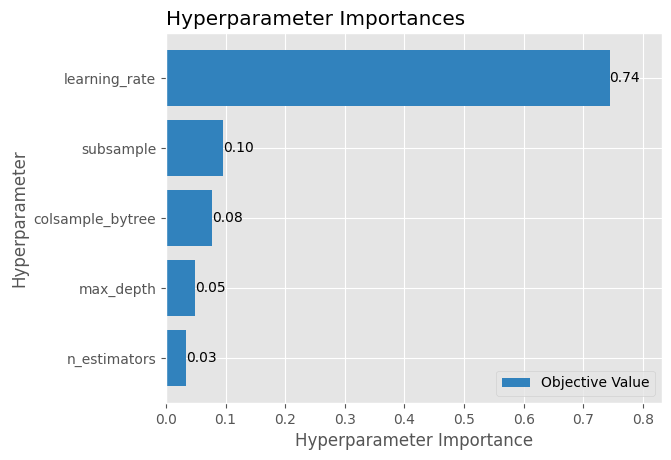

In [12]:
import optuna.visualization.matplotlib as vis
import matplotlib.pyplot as plt

# Visualización para XGBoost
fig_xgb = vis.plot_param_importances(study_xgb)
fig_xgb.gca().set_title("Importancia de Hiperparámetros - XGBoost")
plt.show()

# Visualización para LightGBM
fig_lgb = vis.plot_param_importances(study_lgb)
fig_lgb.gca().set_title("Importancia de Hiperparámetros - LightGBM")
plt.show()

# Visualización para Red Neuronal
fig_nn = vis.plot_param_importances(study_nn)
fig_nn.gca().set_title("Importancia de Hiperparámetros - MLPClassifier")
plt.show()